Can we use indicial functions to represent the effect of the finite wing vortices as they shed away 

A vortex of unit strength that sheds away from the airfoil

In [15]:
include("../src/UNSflow.jl")
using UNSflow

In [16]:

#Define a surface 

alphadef = ConstDef(0.)
hdef = ConstDef(0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)
pvt = 0.0 #leading edge
lespcrit = [0.18;] #Note that the value is entered as an array. 
surf = TwoDSurf("FlatPlate", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [17]:
t = 0
dt = 0.015
place_tev(surf,curfield,dt)
curfield.tev[1].s = -0.01

-0.01

In [18]:
update_indbound(surf, curfield)
update_downwash(surf, [curfield.u[1],curfield.w[1]])
update_a0anda1(surf)

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.0,0.0,0.0,0.0,1.0,0.0),[-1.0,-0.999482,-0.997928,-0.995343,-0.991731,-0.9871,-0.981459,-0.97482,-0.967197,-0.958606  …  -0.0413943,-0.0328031,-0.0251802,-0.0185414,-0.0129005,-0.00826915,-0.00465703,-0.00207158,-0.000518163,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,

In [19]:
mat = zeros(500,2)

500×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮       
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [22]:
for i = 1:500
    t = t+ dt
    update_indbound(surf, curfield)
    update_downwash(surf, [curfield.u[1],curfield.w[1]])
    update_a0anda1(surf)
    mat[i,:] = [t, surf.a0[1]]
    update_boundpos(surf, dt)
end

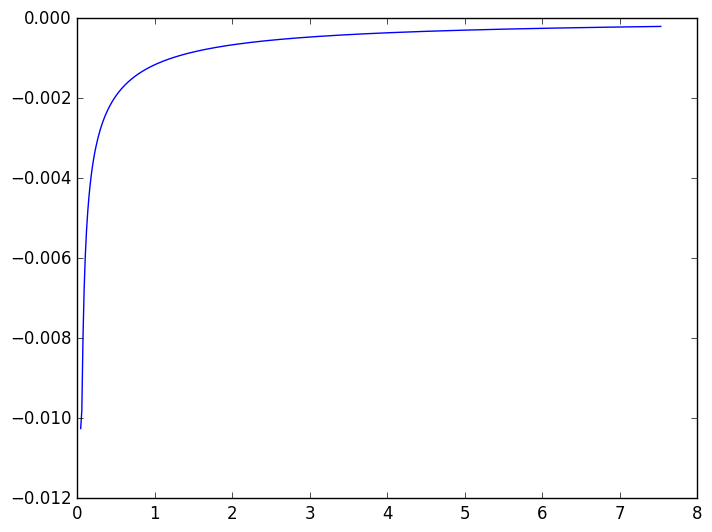

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32442bcd0>

In [25]:
plot(mat[:,1],mat[:,2])

In [26]:
# To imitate wagner - add a0 = 1*pi/180, tev strength would be pi*pi/180 

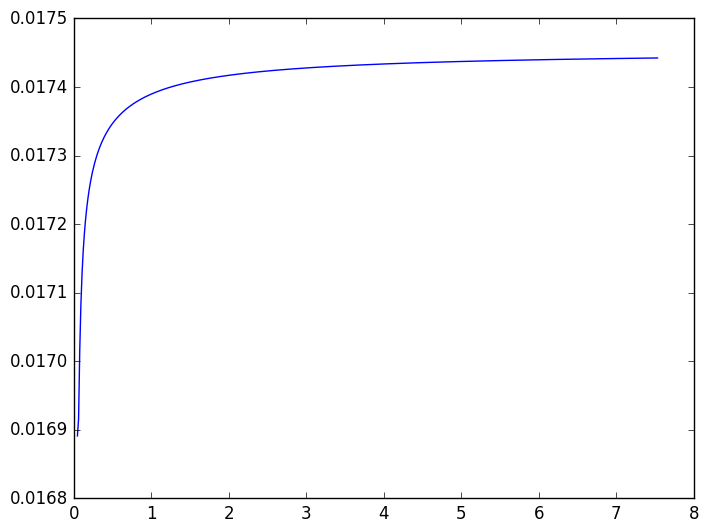

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3244e7fd0>

In [27]:
plot(mat[:,1],mat[:,2]*pi*pi/180 + pi/180)